In [153]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
matplotlib.style.use('bmh')


In [154]:
data=pd.read_csv('kc_house_data.csv')
data


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [155]:
#пропущеные значения
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0.0%
date - 0.0%
price - 0.0%
bedrooms - 0.0%
bathrooms - 0.0%
sqft_living - 0.0%
sqft_lot - 0.0%
floors - 0.0%
waterfront - 0.0%
view - 0.0%
condition - 0.0%
grade - 0.0%
sqft_above - 0.0%
sqft_basement - 0.0%
yr_built - 0.0%
yr_renovated - 0.0%
zipcode - 0.0%
lat - 0.0%
long - 0.0%
sqft_living15 - 0.0%
sqft_lot15 - 0.0%


In [156]:
data.nunique()


id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

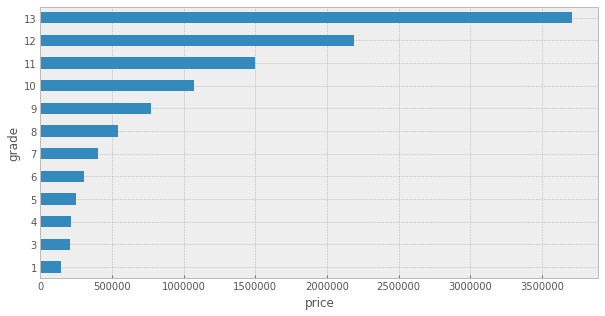

In [157]:
#класс/цена
groups = data.groupby(['grade'])['price'].mean()
plt.figure(figsize=(10, 5))
plt.xlabel('price')
groups.plot.barh()
plt.show()

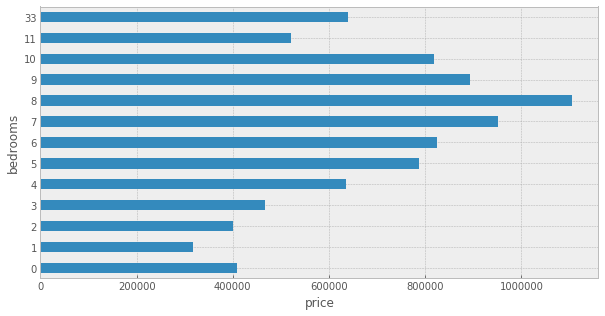

In [158]:
# спальни/цена
groups = data.groupby(['bedrooms'])['price'].mean()
plt.figure(figsize=(10, 5))
plt.xlabel('price')
groups.plot.barh()
plt.show()

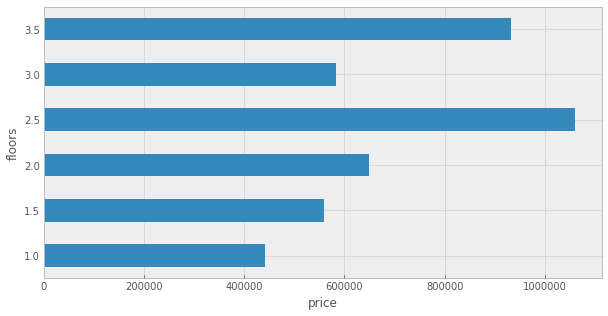

In [159]:
# этажи/цена
groups = data.groupby(['floors'])['price'].mean()
plt.figure(figsize=(10, 5))
plt.xlabel('price')
groups.plot.barh()
plt.show()


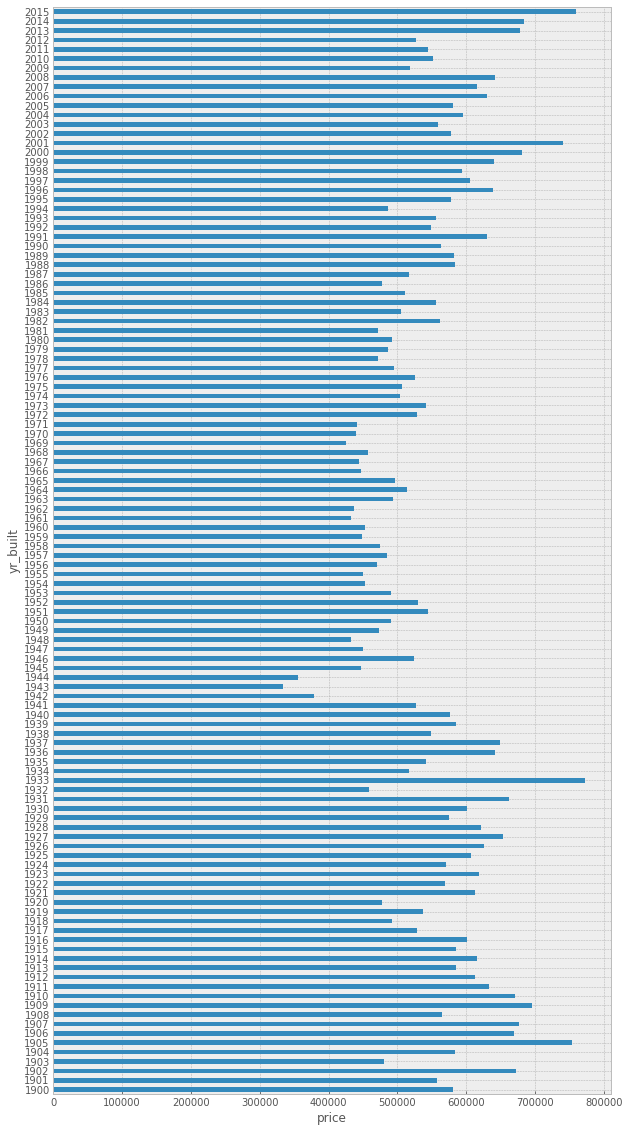

In [160]:
# год_постройки/цена
groups = data.groupby(['yr_built'])['price'].mean()
plt.figure(figsize=(10, 20))
plt.xlabel('price')
groups.plot.barh()
plt.show()

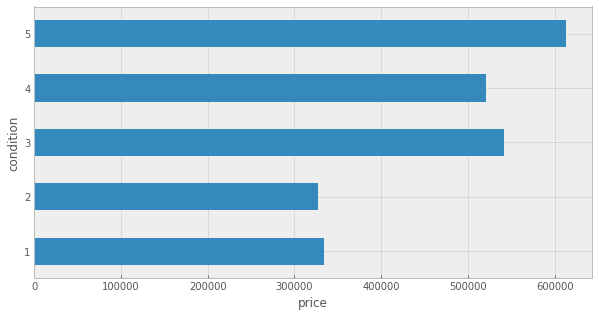

In [175]:
#состояние/цена
groups = data.groupby(['condition'])['price'].mean()
plt.figure(figsize=(10, 5))
plt.xlabel('price')
groups.plot.barh()
plt.show()

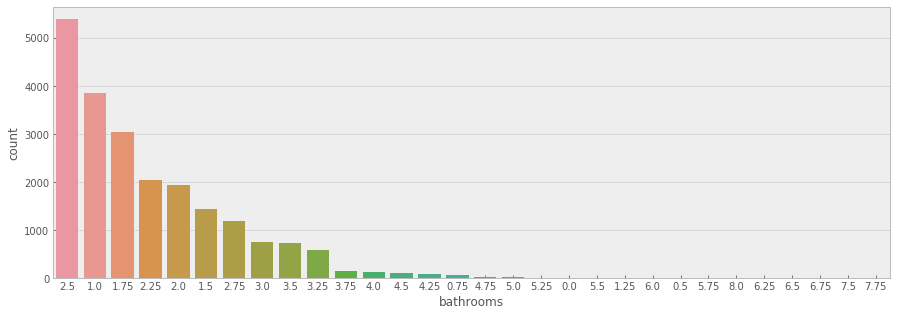

In [161]:
# кол-во ванных
plt.figure(figsize=(15, 5))
sns.countplot(data.bathrooms, order = data['bathrooms'].value_counts().index)
plt.show()

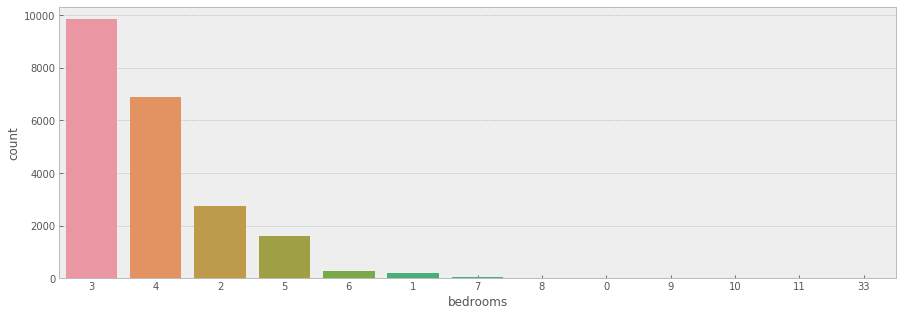

In [162]:
# кол-во спалень
plt.figure(figsize=(15, 5))
sns.countplot(data.bedrooms, order = data['bedrooms'].value_counts().index)
plt.show()

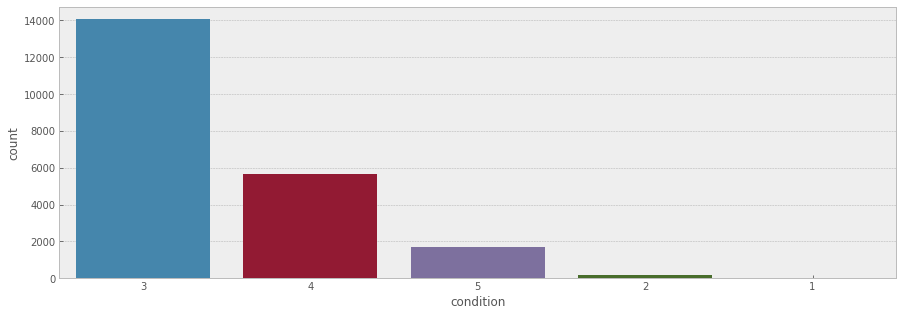

In [163]:
# состояние
plt.figure(figsize=(15, 5))
sns.countplot(data.condition, order = data['condition'].value_counts().index)
plt.show()

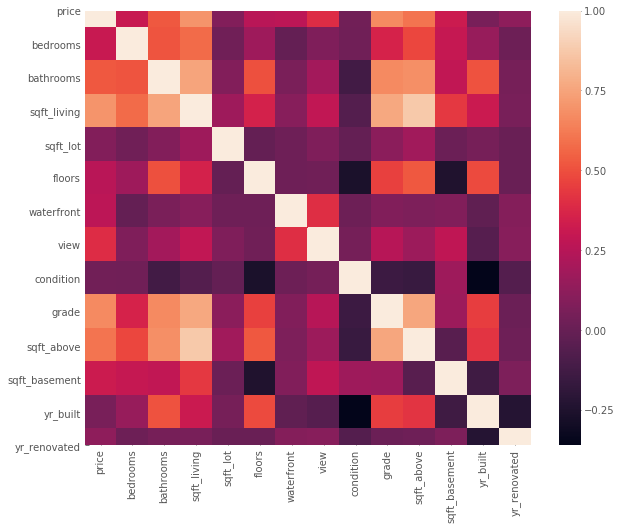

In [164]:
#корреляция
features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
            'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
            'yr_renovated']
plt.figure(figsize=(10, 8))

corr = data[features].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [165]:
#отобранные признаки
FeaturesForRegression = data[features]

In [166]:
FeaturesForRegression.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0


In [167]:
#модель регрессия
X=FeaturesForRegression.drop('price',axis=1)
y=FeaturesForRegression['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=42)
lm = linear_model.LinearRegression() 
model = lm.fit(X_train[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated']], y_train)



In [168]:
 X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
735,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0
2830,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0
4106,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0
16218,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0
19964,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13674,3,1.75,1250,7710,1.0,0,0,4,7,1250,0,1947,0
20377,3,2.75,2830,3496,2.0,0,0,3,8,2830,0,2012,0
8805,4,2.50,2434,4400,2.0,0,0,3,8,2434,0,2007,0
10168,4,1.75,2250,10108,1.0,0,0,4,8,2250,0,1967,0


In [169]:
y_test

735       365000.0
2830      865000.0
4106     1038000.0
16218    1490000.0
19964     711000.0
           ...    
13674     338000.0
20377     673000.0
8805      285000.0
10168     605000.0
2522      356500.0
Name: price, Length: 4323, dtype: float64

In [170]:

print(model.score(X_test,y_test))


0.6521777051746778


In [171]:
prediction= model.predict([[4,2.25,2070,8893,2,0,0,4,8,2070,0,1986,0]]) 
print('Предикт: ',prediction)

Предикт:  [516165.79233481]


In [172]:
prediction= model.predict([[5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0]])
print('Предикт: ',prediction)

Предикт:  [681329.40783423]


In [173]:
prediction= model.predict([[4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0]])
print('Предикт: ',prediction)

Предикт:  [1219054.17289802]
